# Logistic Regrssion (Classification)

In [16]:
# Import necessary modules

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [17]:
# Load data

df = pd.read_csv('./Data/diabetes.csv')

# Create targets and features

X = df.drop('Outcome', axis=1).values[:,1:8]  # NumPy
y = df['Outcome'].values

# Create training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=42)    

In [18]:
# Create the classifier: logreg
logreg = LogisticRegression()

In [19]:
# Fit the classifier to the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [21]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[173  33]
 [ 38  64]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       206
           1       0.66      0.63      0.64       102

    accuracy                           0.77       308
   macro avg       0.74      0.73      0.74       308
weighted avg       0.77      0.77      0.77       308



# ROC curve

In [22]:
from sklearn.metrics import roc_curve

In [23]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [24]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 

# fpr : false positive rate 
# tpr : true positive rate 
# thresholds 

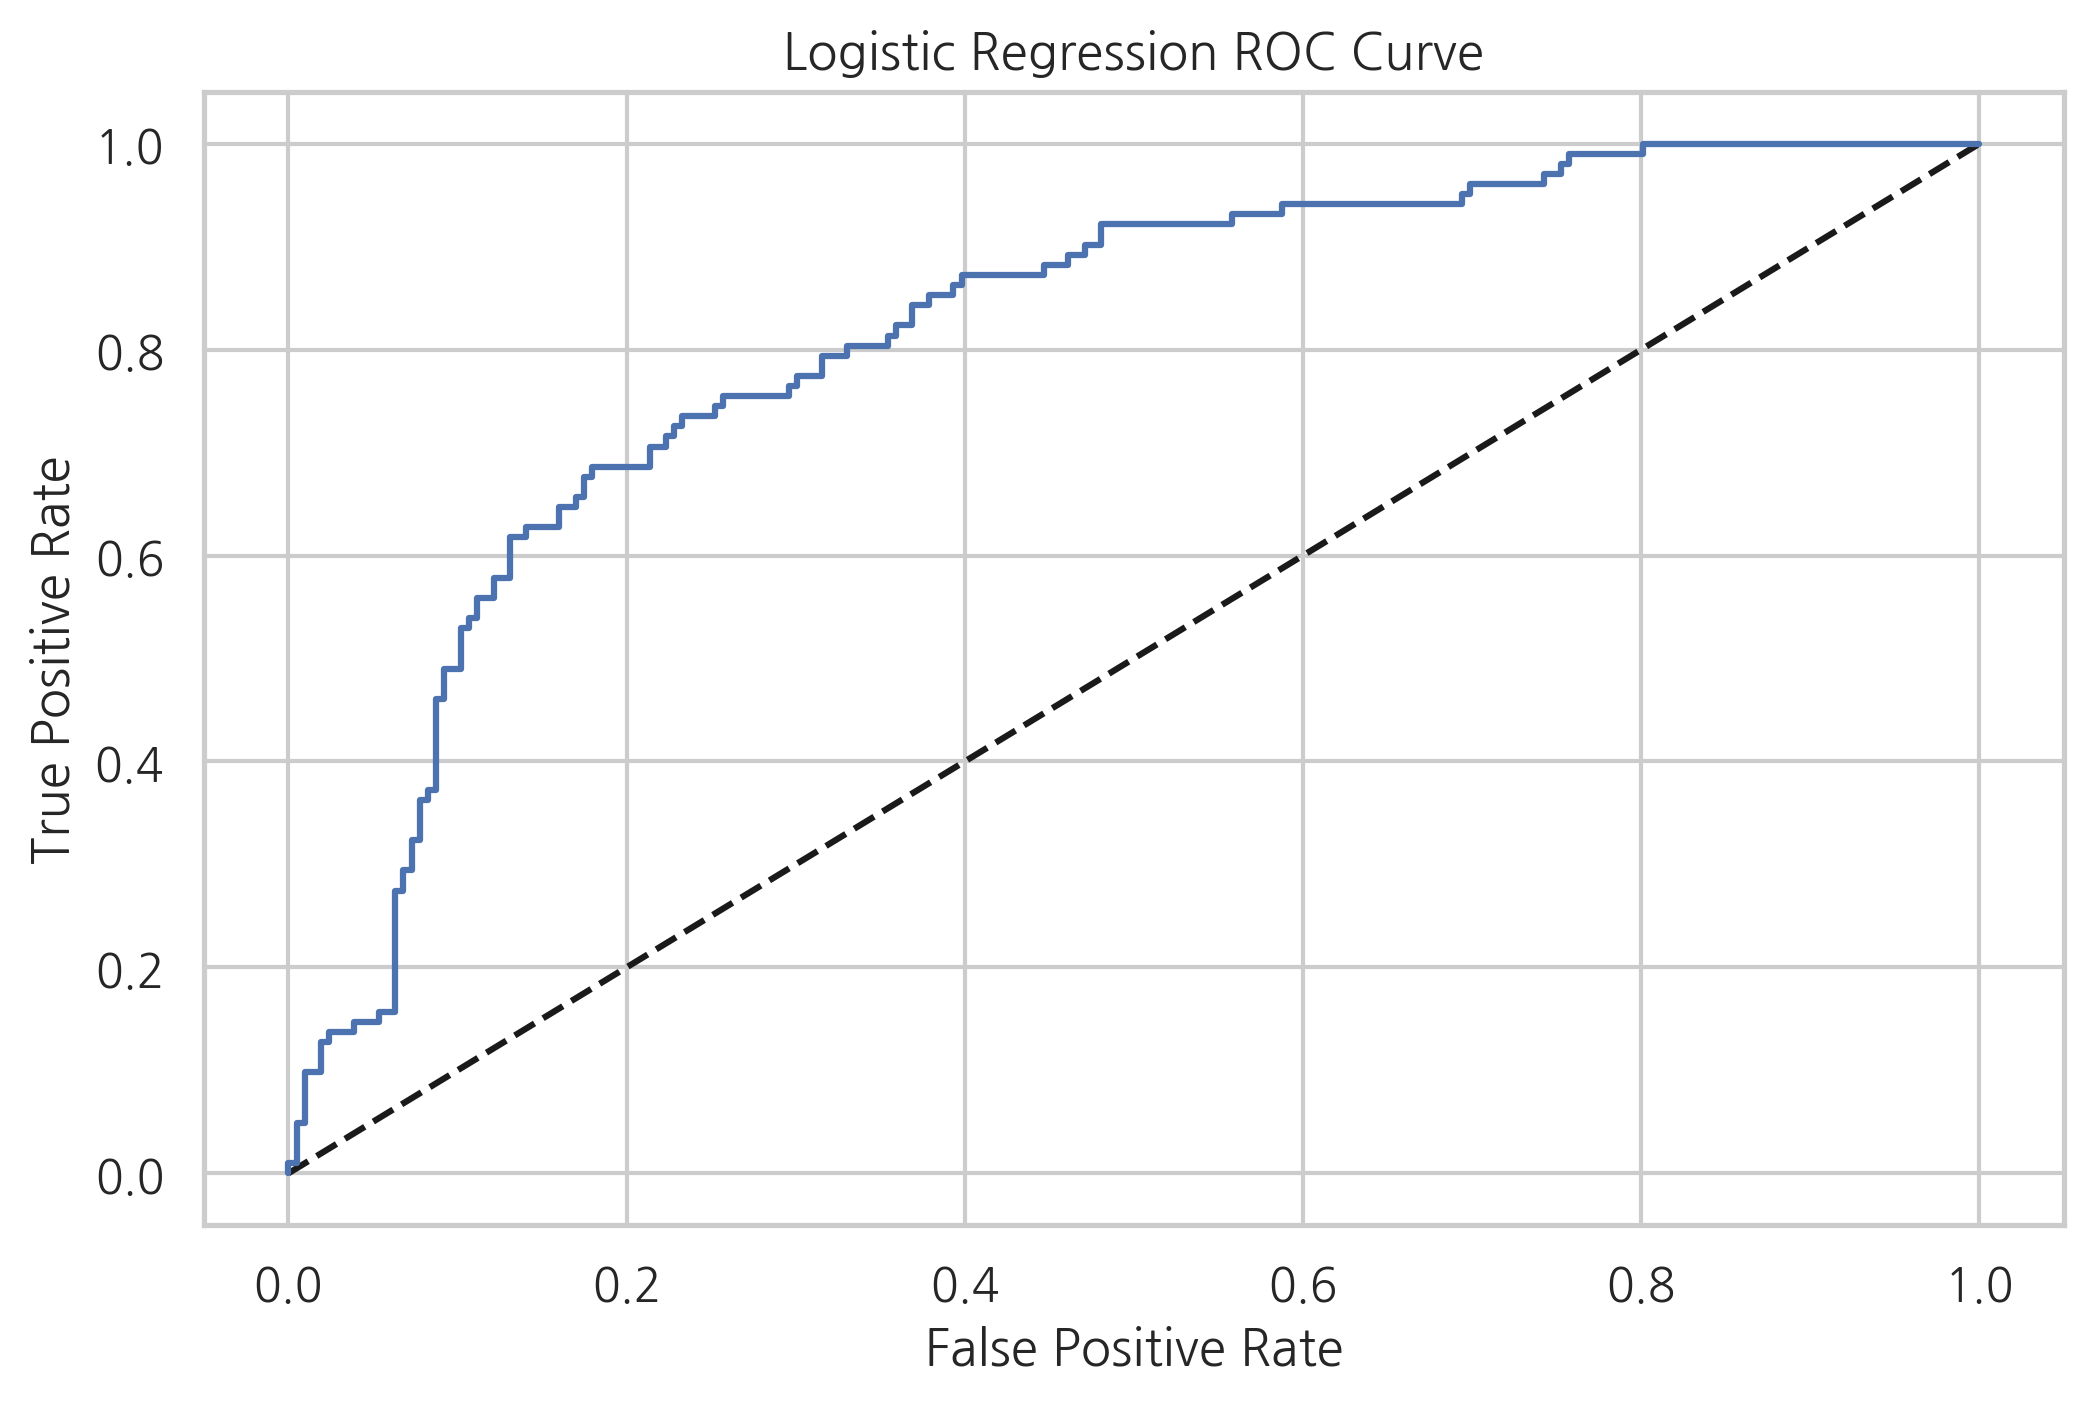

In [25]:
# Plot ROC curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# AUC

In [30]:
from sklearn.metrics import roc_auc_score

# Compute and print AUC score
roc_auc_score(y_test, y_pred_prob)

0.8116790405482581

In [31]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8116790405482581


# AUC using cross-validation

In [27]:
from sklearn.model_selection import cross_val_score

# Compute cross-validated AUC scores: cv_auc
cv_scores = cross_val_score(logreg, X, y, cv=5,
                            scoring='roc_auc')

# Print list of AUC scores
print(cv_scores)

[0.81222222 0.78648148 0.81555556 0.86358491 0.83264151]


In [33]:
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

AUC scores computed using 5-fold cross-validation: [0.81222222 0.78648148 0.81555556 0.86358491 0.83264151]
